# STOCHASTIC GRADIENT DESCENT

In [ ]:
# Types of gradient descent
    # Stochastic gradient descent :
        # Stochastic Gradient Descent updates the weights using one data sample at a time.
        # It is fast and noisy, and the noise helps escape local minima in non-convex problems.
        # For every row we update the weights and bias.. coz it works on row basis.
    # Mini-batch gradient descent : 
        # Mini-Batch Gradient Descent updates the weights using small batches of data (e.g., 16, 32, 64, 128).
        # It combines the stability of batch GD and the speed of SGD, making it the most commonly used method in deep learning.

# CODE SINGLE VARIATE

In [45]:
# Importing necessary packages
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 30, random_state = 42)

# Applying linear regression model
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
y_predict

array([-66.86590003,  72.09927603,  39.14832343, -20.50862395,
       -12.68624795, -15.53581321, -24.15457785, -88.40112905,
        39.61268376,  45.02937857,  49.96777091,  16.59494631,
       -61.54999497, -27.32555034, -58.090818  , -24.82038747,
        47.22150938,  10.89237148,  35.48069624,  17.51535122,
        15.92667056, -51.24861481, -30.83565732,  74.33453155,
        36.9152825 ,   3.45396042,  16.8070545 , -71.64793545,
        48.60754448, -74.31096926])

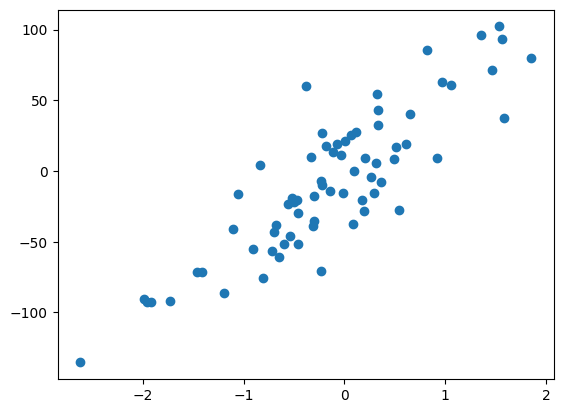

In [46]:
# Plotting X, y
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.show()

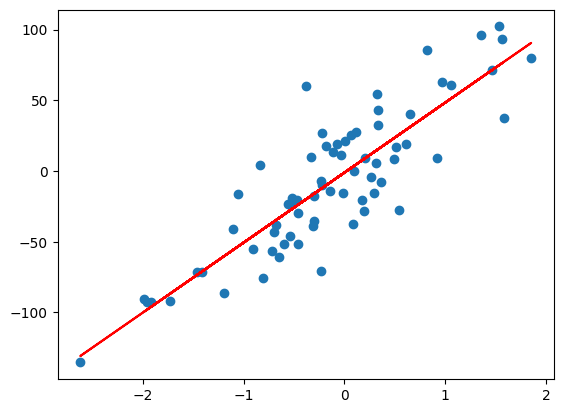

In [47]:
# Plotting best fit line from OLS
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.show()

In [48]:
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

r2score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
coef_ = lr.coef_
intercept_ = lr.intercept_
print("R Square: ", r2score)
print("Mean Squared Error: ", mse)
print("Slope: ", coef_)
print("Intercept: ", intercept_)

R Square:  0.6623800505331392
Mean Squared Error:  931.2572415094884
Slope:  [49.52288296]
Intercept:  -1.0902977743490574


In [49]:
# Stochastic Gradient Descent Single Variate
import random
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Importing necessary packages
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 30, random_state = 42)

# Applying linear regression model
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

class SGD_Regressor:
    def __init__(self, epoch = 40, learning_rate = 0.001, weight_decay = 0.01):
        # we calc the m row by row.
        self.epoch = epoch
        self.weight_decay = weight_decay
        self.alpha = learning_rate
        self.slope = 0
        self.intercept = 0
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        for _ in range(self.epoch):
            for _ in range(self.X.shape[0]):
                random_row = random.randint(0, self.X.shape[0]-1) 
                m = -2 * float(self.X[random_row]) * (float(self.y[random_row]) - (self.slope * float(self.X[random_row])) - self.intercept)
                b = -2 * (float(self.y[random_row])  - (self.slope * float(self.X[random_row])) - self.intercept)
                step_size_m = self.alpha * m
                self.slope = self.slope - step_size_m
                step_size_b = self.alpha * b
                self.intercept = self.intercept - step_size_b
                
        print("Slope : ", self.slope)
        print("Intercept : ", self.intercept)
        

    def fit_with_learning_schedule(self, X, y):
        self.X = X
        self.y = y
        for i in range(self.epoch):
            current_alpha = self.alpha/(1+i*self.weight_decay)
            for _ in range(self.X.shape[0]):
                random_row = random.randint(0, self.X.shape[0]-1) 
                m = -2 * float(self.X[random_row]) * (float(self.y[random_row]) - (self.slope * float(self.X[random_row])) - self.intercept)
                b = -2 * (float(self.y[random_row])  - (self.slope * float(self.X[random_row])) - self.intercept)
                step_size_m = current_alpha * m
                self.slope = self.slope - step_size_m
                step_size_b = current_alpha * b
                self.intercept = self.intercept - step_size_b
                
        print("Slope : ", self.slope)
        print("Intercept : ", self.intercept)
        
    def predict(self, X_):
        self.X_ = X_
        y_predi = np.dot(self.X_, self.slope) + self.intercept
        return y_predi
    

mywish = SGD_Regressor()
# mywish.fit(X_train, y_train) 
mywish.fit_with_learning_schedule(X_train, y_train)
mywish.predict(X_test)

# r2
r2score = r2_score(y_test, mywish.predict(X_test))
print("R Square: ", r2score)

Slope :  48.512276184434256
Intercept :  -0.6625653725621389
R Square:  0.6672421107552088


C:\Users\amirp\AppData\Local\Temp\ipykernel_27640\683483199.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = -2 * float(self.X[random_row]) * (float(self.y[random_row]) - (self.slope * float(self.X[random_row])) - self.intercept)
C:\Users\amirp\AppData\Local\Temp\ipykernel_27640\683483199.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = -2 * (float(self.y[random_row])  - (self.slope * float(self.X[random_row])) - self.intercept)


# CODE MULTI VARIATE

In [50]:
# Importing necessary packages
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 100, n_features = 10, n_targets = 1, noise = 90, random_state = 42)

# Applying linear regression model
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
y_predict

array([ 168.80411691, -391.39459119,  282.67241009,  178.21349515,
        317.26071444,  274.53511745,  -83.34538508,  195.25821905,
       -229.92612915, -524.94885208,  106.76850379, -127.29452166,
         75.41640537,  -54.10180726, -101.66719284, -160.03747181,
        103.31150512,  238.76553513, -254.13876227,  172.92785899,
        -45.82755829,  225.15361609,  366.84323076,   61.90564715,
        160.56452404,  -91.56062908, -103.97351353,   -2.23009308,
       -112.15726467,    4.06092735])

In [51]:
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

r2score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
coef_ = lr.coef_
intercept_ = lr.intercept_
print("R Square: ", r2score)
print("Mean Squared Error: ", mse)
print("Slope: ", coef_)
print("Intercept: ", intercept_)

R Square:  0.8125904627586051
Mean Squared Error:  11216.318834681148
Slope:  [ 34.41625294  62.40086682  -4.23598646  72.02253988  80.99438718
  55.4070838   62.94690004 -11.00850939  -2.64080645  71.73453961]
Intercept:  16.390033186238078


In [55]:
# Stochastic Gradient Descent Multi Variate

import random
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Importing necessary packages
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 100, n_features = 10, n_targets = 1, noise = 90, random_state = 42)

# Applying linear regression model
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

class SGD_Regressor:
    def __init__(self, epoch = 100, learning_rate = 0.001, weight_decay = 0.01):
        # we calc the m row by row.
        self.epoch = epoch
        self.weight_decay = weight_decay
        self.alpha = learning_rate
        self.slope = np.zeros(X.shape[1]) # Listen bro this is multivariate so no of weights should be equal to the no of columns
        self.intercept = 0
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        for epoch in range(self.epoch):
            for _ in range(self.X.shape[0]):
                random_row = random.randint(0, self.X.shape[0]-1)
                prediction = np.dot(self.X[random_row],self.slope) + self.intercept
                error = (self.y[random_row] - prediction)
                for i in range(0, self.X.shape[1]):
                    m = -2 * self.X[random_row][i]*(error)
                    step_size_m = self.alpha * m
                    self.slope[i] = self.slope[i] - step_size_m
                b = -2 * error
                step_size_b = self.alpha * b
                self.intercept = self.intercept - step_size_b
                
        print("Slope : ", self.slope)
        print("Intercept : ", self.intercept)
        

    def fit_with_learning_schedule(self, X, y):
        self.X = X
        self.y = y
        for epoch in range(self.epoch):
            current_alpha = self.alpha/(1+epoch*self.weight_decay)
            for _ in range(self.X.shape[0]):
                random_row = random.randint(0, self.X.shape[0]-1)
                prediction = np.dot(self.X[random_row],self.slope) + self.intercept
                error = (self.y[random_row] - prediction)
                for i in range(0, self.X.shape[1]):
                    m = -2 * self.X[random_row][i]*(error)
                    step_size_m = current_alpha * m
                    self.slope[i] = self.slope[i] - step_size_m
                b = -2 * error
                step_size_b = current_alpha * b
                self.intercept = self.intercept - step_size_b
                
        print("Slope : ", self.slope)
        print("Intercept : ", self.intercept)
        
        
    def predict(self, X_):
        self.X_ = X_
        y_predi = np.dot(self.X_, self.slope) + self.intercept
        return y_predi
    

yourwish = SGD_Regressor()
# yourwish.fit(X_train, y_train)
yourwish.fit_with_learning_schedule(X_train, y_train)
yourwish.predict(X_test)

# r2
r2score = r2_score(y_test, yourwish.predict(X_test))
print("R Square: ", r2score)

Slope :  [ 34.11720175  64.3605675   -4.14912641  71.96914169  83.62313708
  57.11028452  62.75827779 -11.49098648  -2.0349926   72.83253047]
Intercept :  17.590336548959762
R Square:  0.8166698084141545
